# COVID-19 Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/shaukat/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [27]:
# Read the data
confirmed = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
confirmed.rename(columns={'Country/Region':'country'}, inplace=True)
confirmed = confirmed.drop(columns=['Province/State'])
confirmed.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [28]:
deaths = pd.read_csv('data/time_series_covid19_deaths_global.csv')
deaths.rename(columns={'Country/Region':'country'}, inplace=True)
deaths = deaths.drop(columns=['Province/State'])
deaths.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
recovered = pd.read_csv('data/time_series_covid19_recovered_global.csv')
recovered.rename(columns={'Country/Region':'country'}, inplace=True)
recovered = recovered.drop(columns=['Province/State'])
recovered.head()

,country,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,10
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,12,12,12,12,32,32,32,65,65,24
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Plot one Country

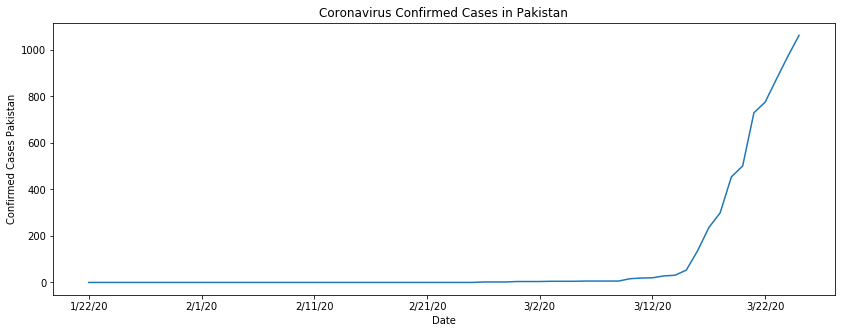

In [24]:
plt.figure(figsize=(14,5))
plt.xlabel('Date')
plt.ylabel('Confirmed Cases Pakistan')
plt.title('Coronavirus Confirmed Cases in Pakistan')
confirmed[confirmed['Country/Region']=='Pakistan'].iloc[0].iloc[4:].plot(kind='line')

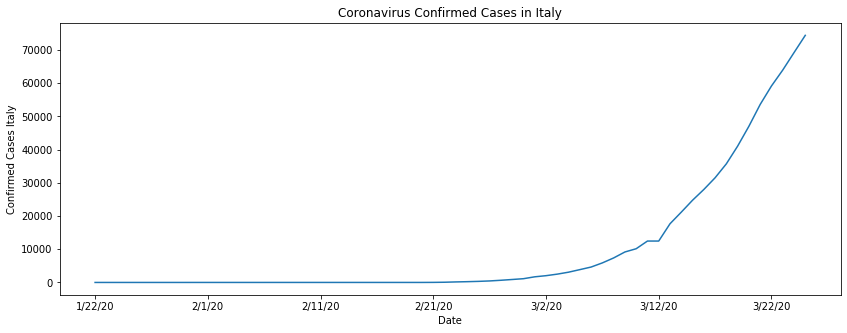

In [25]:
plt.figure(figsize=(14,5))
plt.xlabel('Date')
plt.ylabel('Confirmed Cases Italy')
plt.title('Coronavirus Confirmed Cases in Italy')
confirmed[confirmed['Country/Region']=='Italy'].iloc[0].iloc[4:].plot(kind='line')

In [31]:
df = confirmed.T
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Syria,Timor-Leste,Belize,Canada,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis
Lat,33,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,34.8021,-8.87422,13.1939,0,19.8563,26.3351,31.9522,11.8037,17.5707,17.3578
Long,65,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,38.9968,125.728,-59.5432,0,102.495,17.2283,35.2332,-15.1804,-3.99617,-62.783
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/21/20,24,76,139,88,2,1,158,160,9,436,...,0,0,0,0,0,0,48,0,0,0
3/22/20,40,89,201,113,2,1,266,194,19,669,...,1,1,0,0,0,0,52,0,0,0
3/23/20,40,104,230,133,3,3,301,235,32,669,...,1,1,1,0,0,0,59,0,0,0
3/24/20,74,123,264,164,3,3,387,249,39,818,...,1,1,1,0,2,1,59,0,0,0


## Find distance between two countries

In [ ]:
# Between Pakistan and Italy
